# kNN Implementation

## Dataset

The Iris data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.



### Load dataset

In [6]:
# Your Code here
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
features = iris.feature_names
target = iris.target_names

### Visualization

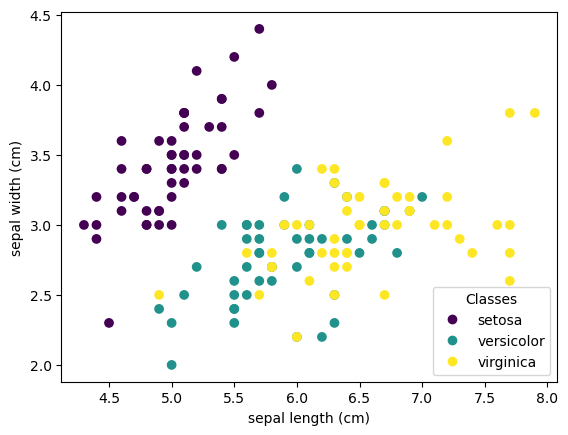

In [8]:
# Your Code Here
import matplotlib.pyplot as plt
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:,0], iris.data[:,1],c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel= iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0],iris.target_names, loc = "lower right",
    title = "Classes"
)


Each point in the scatter plot refers to one of the 150 iris flowers in the dataset, with the color indicating their respective type (Setosa, Versicolour, and Virginica). You can already see a pattern regarding the Setosa type, which is easily identifiable based on its short and wide sepal. Only considering these 2 dimensions, sepal width and length, there’s still overlap between the Versicolor and Virginica types.



## k-NN Implementation

### Euclidean distance


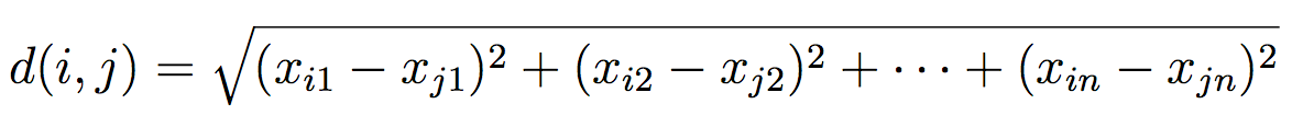

In [10]:
import numpy as np
def euclidean_distance(x1,x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance
  # pass

### Libraries

In [ ]:
# Import Your libraries
import numpy as np

### Class implementation

In [35]:

class KNN:
    def __init__(self, k):
        self.k = k 

    # Method to fit the model with training data
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Method to predict the class of the samples
    def predict(self, X_test):
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    # Helper method to predict the class for a single point
    def _predict_single(self, x):
        # Calculate distances between x and all points in the training data
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get indices of the k nearest samples
        k_indices = np.argsort(distances)[:self.k]
        # Get the corresponding labels for the nearest samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote: the most common label in the k nearest samples
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

## k-NN Evaluation

In [38]:
# Split Data (X_train, X_test, y-train, y_test)
# 20% test, 80% train
# Your Code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [40]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [46]:
# Create instance, fit (train) the model, and run predictions for X_test
acc = np.sum(predictions == y_test)/len(y_test)
print(acc)

0.9666666666666667


In [ ]:
## Accuracy, #Good predictions / Total Cases


## Using SciKit Learn Knn implementation

In [48]:
#Use SciKit Learn library instead your own code
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
#Predict de new model
accuracy = neigh.predict(X_test)
accuracy

array([1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [54]:
# Create instance, fit (train) the model, and run predictions for X_test
acc = np.sum(predictions == y_test)/len(y_test)
print(acc)

0.9666666666666667
